In [74]:
import pandas as pd


In [156]:
#Importando dados
dados = pd.read_csv('Base_v2.csv', sep = ';', error_bad_lines=False, index_col=False, dtype='unicode')


In [157]:
dados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,190001746144,GO,Goiânia,64,F,1,3,1,1,NaN,NaN,NaN,0,0,0,0,0,0
1,190001029147,PA,Belém,26,F,0,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,190001177099,TO,Palmas,26,F,1,1,1,1,NaN,NaN,1,0,0,0,0,0,0
3,190001482406,PE,Jaboatão dos Guararapes,27,F,2,3,1,1,NaN,NaN,1,120,120,120,120,80,560
4,190001595933,SP,Cafelândia,21,F,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#ajustando os dados análise
dados['NU_NOTA_COMP1'] = dados['NU_NOTA_COMP1'].astype(float).fillna(0)
dados['NU_NOTA_COMP2'] = dados['NU_NOTA_COMP2'].astype(float).fillna(0)
dados['NU_NOTA_COMP3'] = dados['NU_NOTA_COMP3'].astype(float).fillna(0)
dados['NU_NOTA_COMP4'] = dados['NU_NOTA_COMP4'].astype(float).fillna(0)
dados['NU_NOTA_COMP5'] = dados['NU_NOTA_COMP5'].astype(float).fillna(0)
dados['NU_NOTA_REDACAO'] = dados['NU_NOTA_REDACAO'].astype(float).fillna(0)
dados['TP_SEXO'] = dados['TP_SEXO'].fillna(0)
dados['TP_ENSINO'] = dados['TP_ENSINO'].fillna(0)
dados['SG_UF_ESC'] = dados['SG_UF_ESC'].fillna(0)
dados['NO_MUNICIPIO_ESC'] = dados['NO_MUNICIPIO_ESC'].fillna(0)
dados['NU_IDADE'] = dados['NU_IDADE'].astype(float)


dados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,190001746144,GO,Goiânia,64.0,F,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,190001029147,PA,Belém,26.0,F,0,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,190001177099,TO,Palmas,26.0,F,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,190001482406,PE,Jaboatão dos Guararapes,27.0,F,2,3,1,1,0,0,1,120.0,120.0,120.0,120.0,80.0,560.0
4,190001595933,SP,Cafelândia,21.0,F,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
#média dos dados
dados['NU_NOTA_COMP1'].mean()


92.76275339177182

In [160]:
grupo = dados.groupby('TP_SEXO')

In [119]:
grupo.groups

{0: [5095270, 5095271], 'F': [0, 1, 2, 3, 4, 5, 6, 8, 12, 13, 15, 16, 18, 20, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 42, 51, 53, 54, 56, 57, 58, 59, 60, 61, 64, 66, 67, 68, 69, 71, 72, 75, 81, 82, 83, 85, 87, 89, 91, 92, 93, 96, 97, 98, 99, 100, 102, 103, 105, 107, 109, 110, 111, 114, 115, 117, 118, 119, 121, 123, 125, 127, 131, 134, 136, 137, 138, 141, 142, 143, 148, 149, 151, 153, 155, 156, 157, 158, 159, 162, 163, 165, 166, 170, 172, 173, ...], 'M': [7, 9, 10, 11, 14, 17, 19, 21, 22, 25, 33, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 55, 62, 63, 65, 70, 73, 74, 76, 77, 78, 79, 80, 84, 86, 88, 90, 94, 95, 101, 104, 106, 108, 112, 113, 116, 120, 122, 124, 126, 128, 129, 130, 132, 133, 135, 139, 140, 144, 145, 146, 147, 150, 152, 154, 160, 161, 164, 167, 168, 169, 171, 174, 176, 177, 179, 183, 186, 188, 189, 196, 198, 202, 206, 210, 212, 214, 216, 218, 219, 221, 226, 227, 228, 229, 231, 232, 239, ...]}

In [161]:
#Analise 
grupo['TP_SEXO'].describe().round(2)

,count,unique,top,freq
TP_SEXO,,,,
0,2,1,0,2
F,3031822,1,F,3031822
M,2063448,1,M,2063448


In [162]:
#Seleções e Frequências
#Seleção somente dos dados Femininos
selecao_feminino = dados['TP_SEXO'] == 'F'
freq_feminino = dados[selecao_feminino].shape[0]
freq_feminino

#Seleções e Frequências
#Seleção somente dos dados Masculinos
selecao_masculino = dados['TP_SEXO'] == 'M'
freq_masculino = dados[selecao_masculino].shape[0]
freq_masculino

2063448

In [163]:
grupo['NU_NOTA_COMP1'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
0,2.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
F,3031822.0,94.41,59.01,0.0,0.0,120.0,140.0,200.0
M,2063448.0,90.34,57.85,0.0,0.0,120.0,120.0,200.0


In [164]:
grupo['NU_NOTA_COMP1'].aggregate(['count', 'min', 'max', 'mean']).rename(columns = {'count': 'Quantidade', 'min':'Minimo', 'max' : 'Máximo', 'mean' : 'Média'})

,Quantidade,Minimo,Máximo,Média
TP_SEXO,,,,
0,2,0.0,0.0,0.000000
F,3031822,0.0,200.0,94.414672
M,2063448,0.0,200.0,90.335681


In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))


Text(0.5, 1.0, 'Valor da Nota Complementar 1 por Sexo')

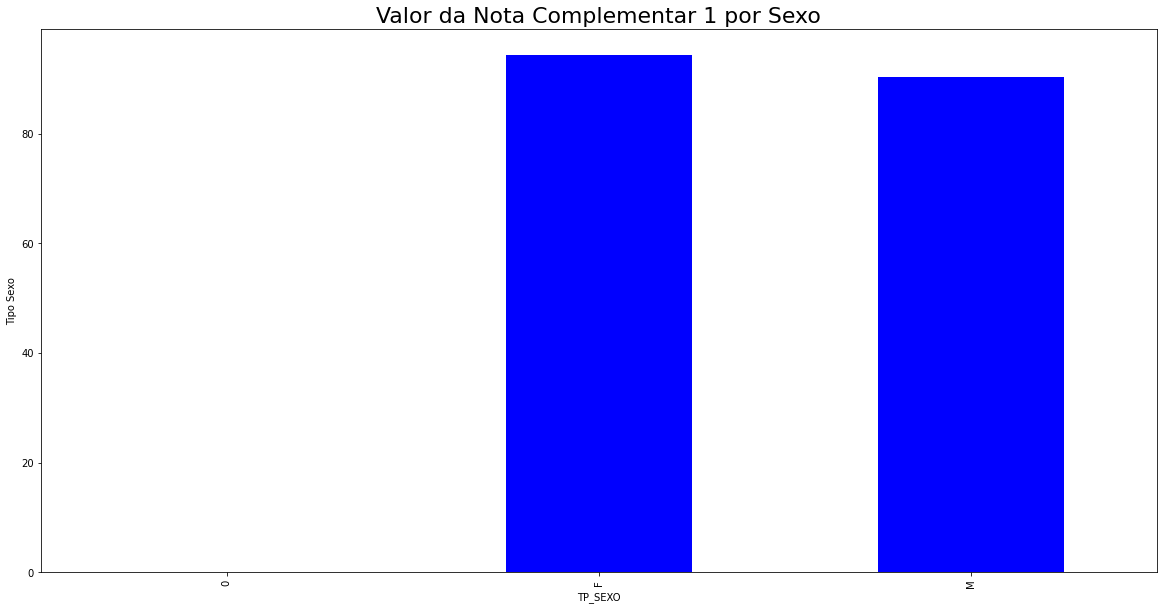

In [166]:
fig = grupo['NU_NOTA_COMP1'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Valor da Nota Complementar 1 por Sexo',{'fontsize':22})



In [167]:
grupo_UF = dados.groupby('SG_UF_RESIDENCIA')

In [168]:
grupo_UF['NU_NOTA_COMP1'].aggregate(['count', 'min', 'max', 'mean']).rename(columns = {'count': 'Quantidade', 'min':'Minimo', 'max' : 'Máximo', 'mean' : 'Média'})

,Quantidade,Minimo,Máximo,Média
SG_UF_RESIDENCIA,,,,
AC,38229,0.0,200.0,87.642889
AL,91707,0.0,200.0,91.696381
AM,118087,0.0,200.0,78.148992
AP,42140,0.0,200.0,86.551495
BA,398095,0.0,200.0,89.683869
CE,295870,0.0,200.0,92.251124
DF,94352,0.0,200.0,93.207563
ES,102435,0.0,200.0,92.347733
GO,170147,0.0,200.0,93.153097


Text(0.5, 1.0, 'Média - Nota Complementar 1 por Sexo')

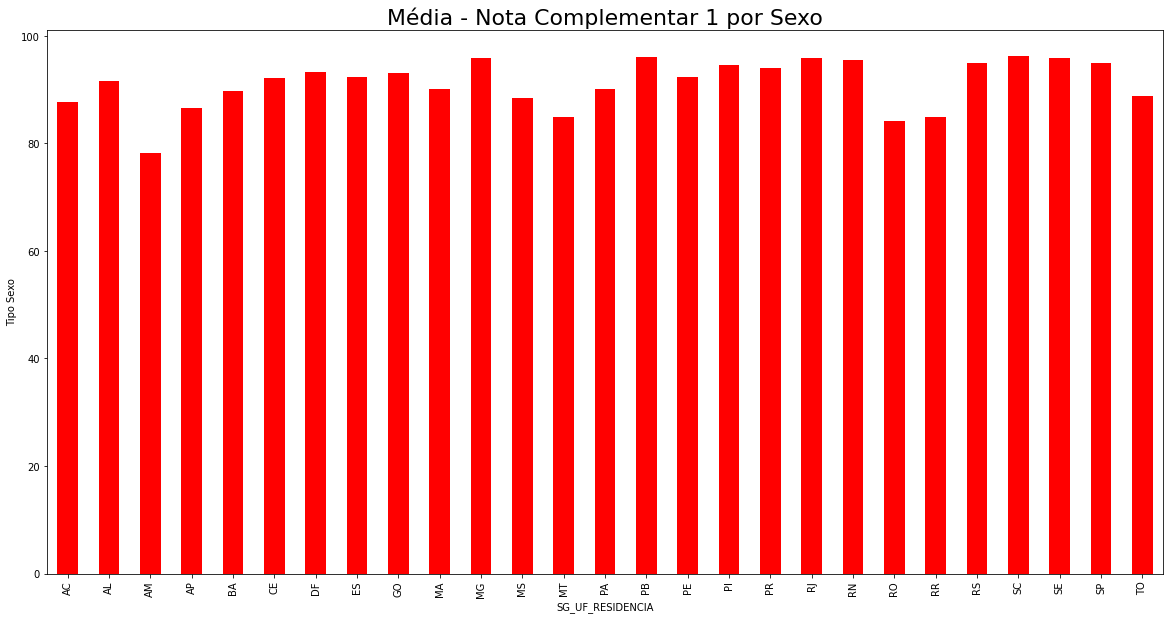

In [169]:
fig = grupo_UF['NU_NOTA_COMP1'].mean().plot.bar(color = 'red')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Média - Nota Complementar 1 por Sexo',{'fontsize':22})


Text(0.5, 1.0, 'Desvio Padrão -  Nota Complementar 1 por Sexo')

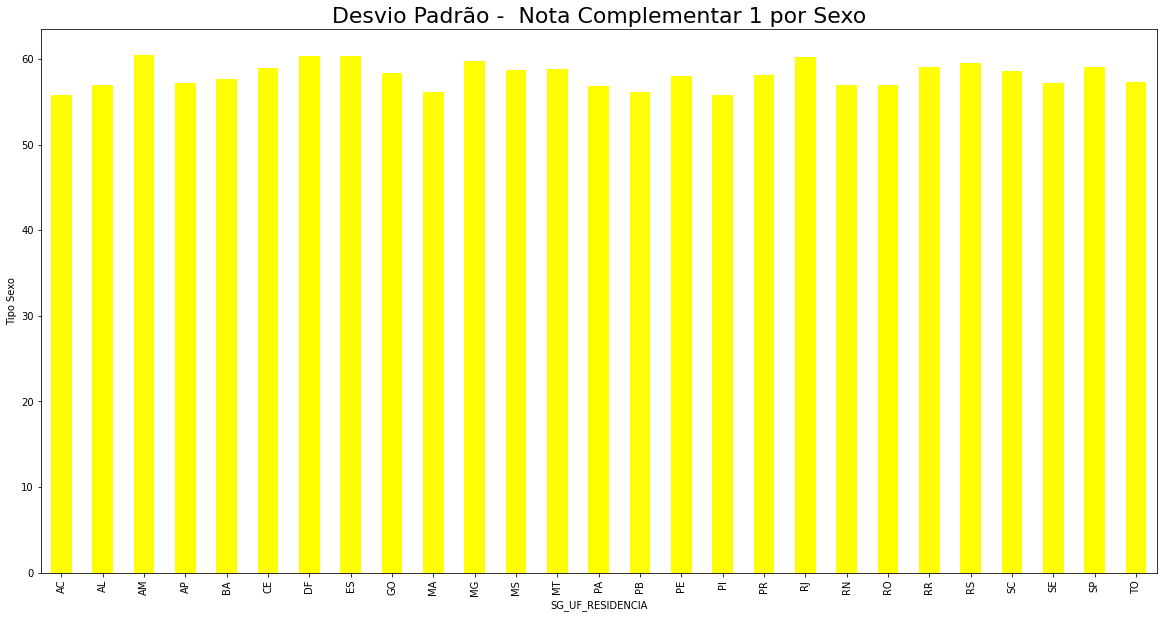

In [170]:
fig = grupo_UF['NU_NOTA_COMP1'].std().plot.bar(color = 'yellow')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Desvio Padrão -  Nota Complementar 1 por Sexo',{'fontsize':22})

In [171]:
uf_sul = ['RS', 'SC', 'PR']
uf_sudeste = ['SP', 'RJ', 'ES', 'MG']
uf_nordeste = ['BA', 'SE', 'AL','PE','PB','RN', 'CE', 'PI', 'MA']
uf_centro_oeste = ['MT', 'MS', 'GO','DF']
uf_norte = ['TO','PA','AM','AP','AC','RO','RR']

In [172]:
dados_sul = dados[dados['SG_UF_RESIDENCIA'].isin(uf_sul)]
dados_sul['REGIAO'] = 'Sul'
dados_sul

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,REGIAO
7,190001871247,PR,Cascavel,20.0,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
14,190001871248,PR,Foz do Iguaçu,30.0,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
22,190001871249,PR,Curitiba,35.0,M,1,1,1,1,0,0,0,140.0,180.0,140.0,120.0,160.0,740.0,Sul
26,190001698277,SC,Criciúma,18.0,F,1,1,1,1,0,0,0,160.0,140.0,160.0,160.0,100.0,720.0,Sul
38,190001720508,RS,Estação,23.0,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095230,190005962347,RS,Santa Vitória do Palmar,21.0,F,1,2,1,1,0,0,1,100.0,120.0,80.0,100.0,20.0,420.0,Sul
5095253,190005911853,PR,Palmas,16.0,F,1,1,1,1,0,0,0,120.0,120.0,120.0,100.0,60.0,520.0,Sul
5095255,190005912942,SC,Florianópolis,20.0,F,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
5095258,190005911854,PR,Curitiba,16.0,M,0,1,1,1,0,0,0,120.0,120.0,120.0,120.0,160.0,640.0,Sul


In [173]:
dados_sudeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_sudeste)]

dados_sudeste['REGIAO'] = 'Sudeste'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
dados_nordeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_nordeste)]
dados_nordeste['REGIAO'] = 'Nordeste'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [175]:
dados_nordeste['REGIAO']

3          Nordeste
18         Nordeste
19         Nordeste
31         Nordeste
36         Nordeste
             ...   
5095252    Nordeste
5095260    Nordeste
5095262    Nordeste
5095264    Nordeste
5095269    Nordeste
Name: REGIAO, Length: 1741107, dtype: object

In [176]:
dados_centro_oeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_centro_oeste)]
dados_centro_oeste['REGIAO'] = 'Centro - Oeste'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [177]:
dados_norte = dados[dados['SG_UF_RESIDENCIA'].isin(uf_norte)]
dados_norte['REGIAO'] = 'Norte'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
# Agrupa por Pclass e Sex e calcula a média de cada grupo

df_media_norte = dados_norte.loc[dados_norte['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_norte

812.9497969071115

In [179]:
# Agrupa por Pclass e Sex e calcula a média de cada grupo

df_media_sul = dados_sul.loc[dados_sul['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_sul

879.7489402962341

In [180]:
df_media_sudeste = dados_sudeste.loc[dados_sudeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_sudeste

905.488944499789

In [138]:
df_media_nordeste = dados_nordeste.loc[dados_nordeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_nordeste

881.2593367323203

In [139]:
df_media_centro_oeste = dados_centro_oeste.loc[dados_centro_oeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_centro_oeste

856.9577191758963

In [140]:
df_media_centro_oeste

856.9577191758963

In [181]:
#unir dados de todos os dataframe
df_dados = pd.concat([dados_sul,dados_sudeste, dados_centro_oeste,dados_norte, dados_nordeste])
df_dados





,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,REGIAO
7,190001871247,PR,Cascavel,20.0,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
14,190001871248,PR,Foz do Iguaçu,30.0,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
22,190001871249,PR,Curitiba,35.0,M,1,1,1,1,0,0,0,140.0,180.0,140.0,120.0,160.0,740.0,Sul
26,190001698277,SC,Criciúma,18.0,F,1,1,1,1,0,0,0,160.0,140.0,160.0,160.0,100.0,720.0,Sul
38,190001720508,RS,Estação,23.0,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095252,190005574210,PB,São José de Piranhas,23.0,M,1,3,1,1,0,0,1,120.0,180.0,140.0,140.0,100.0,680.0,Nordeste
5095260,190005749000,BA,Oliveira dos Brejinhos,30.0,F,1,2,1,1,0,0,0,160.0,120.0,140.0,120.0,100.0,640.0,Nordeste
5095262,190005613633,PE,Santa Cruz do Capibaribe,25.0,F,1,1,1,1,0,0,0,120.0,140.0,120.0,140.0,80.0,600.0,Nordeste
5095264,190005562526,RN,Natal,51.0,F,3,3,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,Nordeste


In [190]:
df_dados['TP_ESTADO_CIVIL'].replace('1', 'Solteiro(a)', inplace=True)
df_dados['TP_ESTADO_CIVIL']

7          Solteiro(a)
14         Solteiro(a)
22         Solteiro(a)
26         Solteiro(a)
38         Solteiro(a)
              ...     
5095252    Solteiro(a)
5095260    Solteiro(a)
5095262    Solteiro(a)
5095264              3
5095269    Solteiro(a)
Name: TP_ESTADO_CIVIL, Length: 5095270, dtype: object

In [191]:
df_dados['TP_ESTADO_CIVIL'].replace('0', 'Não Informado', inplace=True)
df_dados['TP_ESTADO_CIVIL'].replace('2', 'Casado(a)/Mora com o companheiro(a)', inplace=True)
df_dados['TP_ESTADO_CIVIL'].replace('3', 'Divorciado(a)/Desquitado(a)/Separado(a)', inplace=True)
df_dados['TP_ESTADO_CIVIL'].replace('4', 'Viúvo(a)', inplace=True)

df_dados['TP_ESTADO_CIVIL'].unique()

array(['Solteiro(a)', 'Casado(a)/Mora com o companheiro(a)',
       'Não Informado', 'Divorciado(a)/Desquitado(a)/Separado(a)',
       'Viúvo(a)'], dtype=object)

In [195]:
df_dados['TP_ESTADO_CIVIL'].value_counts()

Solteiro(a)                                4398485
Casado(a)/Mora com o companheiro(a)         395855
Não Informado                               206800
Divorciado(a)/Desquitado(a)/Separado(a)      87894
Viúvo(a)                                      6236
Name: TP_ESTADO_CIVIL, dtype: int64

In [196]:
df_dados['TP_COR_RACA'].value_counts()

Parda            2364063
Branca           1831779
Preta             648309
Amarela           116162
Não declarado     103201
Indígena           31756
Name: TP_COR_RACA, dtype: int64

In [ ]:
df_dados['TP_COR_RACA']

In [192]:
df_dados['TP_COR_RACA'].replace('0', 'Não declarado', inplace=True)
df_dados['TP_COR_RACA'].replace('1', 'Branca', inplace=True)
df_dados['TP_COR_RACA'].replace('2', 'Preta', inplace=True)
df_dados['TP_COR_RACA'].replace('3', 'Parda', inplace=True)
df_dados['TP_COR_RACA'].replace('4', 'Amarela', inplace=True)
df_dados['TP_COR_RACA'].replace('5', 'Indígena', inplace=True)

In [193]:
df_dados['TP_ESCOLA'].replace('1', 'Não respondeu', inplace=True)
df_dados['TP_ESCOLA'].replace('2', 'Pública', inplace=True)
df_dados['TP_ESCOLA'].replace('3', 'Privada', inplace=True)
df_dados['TP_ESCOLA'].replace('4', 'Exterior', inplace=True)

In [197]:
df_dados['TP_ESCOLA'].value_counts()

Não respondeu    3629376
Pública          1247262
Privada           218632
Name: TP_ESCOLA, dtype: int64

In [ ]:
df_dados['TP_ESTADO_CIVIL']

In [142]:
df_dados.describe()

,NU_IDADE,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,5.095201e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06,5.095270e+06
mean,2.208764e+01,9.276279e+01,9.450201e+01,8.840129e+01,9.364892e+01,7.047604e+01,4.397910e+02
std,7.454793e+00,5.857670e+01,6.393222e+01,5.981393e+01,6.114947e+01,6.484199e+01,2.919284e+02
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.900000e+01,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,8.000000e+01,5.400000e+02
75%,2.400000e+01,1.400000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.400000e+02
max,9.400000e+01,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03


In [143]:
df_remove = df_dados.loc[(df_dados['TP_SEXO']== 0)]

df_dados.drop(df_remove.index, inplace=True)

df_dados['TP_SEXO'].unique()


array(['M', 'F'], dtype=object)

In [144]:
df_dados['TP_SEXO'].unique()

array(['M', 'F'], dtype=object)

In [145]:
#media por Sexo
df_dados.groupby(['REGIAO','TP_SEXO']).mean()

NU_IDADE  ...  NU_NOTA_REDACAO
REGIAO         TP_SEXO             ...                 
Centro - Oeste F        22.056091  ...       434.219722
               M        22.129989  ...       420.074558
Nordeste       F        22.168858  ...       444.590917
               M        22.336917  ...       434.849177
Norte          F        23.452191  ...       410.250328
               M        23.286917  ...       400.875229
Sudeste        F        21.587017  ...       457.868588
               M        21.778156  ...       445.179539
Sul            F        21.406302  ...       448.543693
               M        21.814972  ...       427.153608

[10 rows x 7 columns]

In [56]:
df_dados.groupby(['REGIAO','TP_SEXO']).mean()

NU_NOTA_COMP1  ...        SOMA
REGIAO         TP_SEXO                 ...            
Centro - Oeste F            92.148863  ...  874.967300
               M            88.847185  ...  862.448615
Nordeste       F           100.874214  ...  973.338888
               M            97.363120  ...  959.790670
Norte          F            96.425121  ...  912.620198
               M            91.521916  ...  887.362013
Sudeste        F            97.337154  ...  934.596293
               M            94.650246  ...  922.786965
Sul            F            96.230996  ...  896.130456
               M            90.899654  ...  862.156863

[10 rows x 7 columns]

In [107]:
df_dados

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,REGIAO
7,190001871247,PR,Cascavel,20,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
14,190001871248,PR,Foz do Iguaçu,30,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
22,190001871249,PR,Curitiba,35,M,1,1,1,1,0,0,0,140.0,180.0,140.0,120.0,160.0,740.0,Sul
26,190001698277,SC,Criciúma,18,F,1,1,1,1,0,0,0,160.0,140.0,160.0,160.0,100.0,720.0,Sul
38,190001720508,RS,Estação,23,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095252,190005574210,PB,São José de Piranhas,23,M,1,3,1,1,0,0,1,120.0,180.0,140.0,140.0,100.0,680.0,Nordeste
5095260,190005749000,BA,Oliveira dos Brejinhos,30,F,1,2,1,1,0,0,0,160.0,120.0,140.0,120.0,100.0,640.0,Nordeste
5095262,190005613633,PE,Santa Cruz do Capibaribe,25,F,1,1,1,1,0,0,0,120.0,140.0,120.0,140.0,80.0,600.0,Nordeste
5095264,190005562526,RN,Natal,51,F,3,3,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,Nordeste


In [146]:
df_dados.groupby(['REGIAO','TP_SEXO']).agg(['mean','max','min'])

NU_IDADE              ... NU_NOTA_REDACAO             
                             mean   max   min  ...            mean     max  min
REGIAO         TP_SEXO                         ...                             
Centro - Oeste F        22.056091  86.0  10.0  ...      434.219722  1000.0  0.0
               M        22.129989  85.0  12.0  ...      420.074558  1000.0  0.0
Nordeste       F        22.168858  94.0  10.0  ...      444.590917  1000.0  0.0
               M        22.336917  92.0  11.0  ...      434.849177  1000.0  0.0
Norte          F        23.452191  79.0  12.0  ...      410.250328  1000.0  0.0
               M        23.286917  85.0  10.0  ...      400.875229  1000.0  0.0
Sudeste        F        21.587017  91.0  11.0  ...      457.868588  1000.0  0.0
               M        21.778156  91.0  10.0  ...      445.179539  1000.0  0.0
Sul            F        21.406302  79.0  10.0  ...      448.543693  1000.0  0.0
               M        21.814972  84.0  12.0  ...      427.153608  1000.0  0.0

[10 rows x 21 columns]

In [115]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5095270 entries, 7 to 5095269
Data columns (total 19 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             object 
 1   SG_UF_RESIDENCIA         object 
 2   NO_MUNICIPIO_RESIDENCIA  object 
 3   NU_IDADE                 object 
 4   TP_SEXO                  object 
 5   TP_ESTADO_CIVIL          object 
 6   TP_COR_RACA              object 
 7   TP_NACIONALIDADE         object 
 8   TP_ESCOLA                object 
 9   SG_UF_ESC                object 
 10  NO_MUNICIPIO_ESC         object 
 11  TP_ENSINO                object 
 12  NU_NOTA_COMP1            float64
 13  NU_NOTA_COMP2            float64
 14  NU_NOTA_COMP3            float64
 15  NU_NOTA_COMP4            float64
 16  NU_NOTA_COMP5            float64
 17  NU_NOTA_REDACAO          float64
 18  REGIAO                   object 
dtypes: float64(6), object(13)
memory usage: 937.5+ MB


In [41]:
df_dados_soma = df_dados.iloc[:,12:16].sum(axis=1)
df_dados_soma

7           0.0
14          0.0
22        580.0
26        620.0
38          0.0
          ...  
124999    560.0
125007      0.0
125009    600.0
125015    380.0
125019    440.0
Length: 125021, dtype: float64

In [42]:
df_dados.groupby(['REGIAO']).mean()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
REGIAO,,,,,,
Centro - Oeste,91.015441,93.911443,87.426117,92.128029,70.853871,435.334901
Nordeste,99.534504,104.005239,97.179542,102.383304,80.982093,484.084682
Norte,94.651299,97.117898,91.189253,96.664220,72.118632,451.741301
Sudeste,96.442817,99.538943,92.909585,97.463498,78.977937,465.332781
Sul,94.640399,94.134549,88.893668,93.331039,71.997591,442.997247


In [43]:
df_dados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,REGIAO
7,190001871247,PR,Cascavel,20,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
14,190001871248,PR,Foz do Iguaçu,30,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
22,190001871249,PR,Curitiba,35,M,1,1,1,1,0,0,0,140.0,180.0,140.0,120.0,160.0,740.0,Sul
26,190001698277,SC,Criciúma,18,F,1,1,1,1,0,0,0,160.0,140.0,160.0,160.0,100.0,720.0,Sul
38,190001720508,RS,Estação,23,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul


In [44]:
dados_nordeste['REGIAO']

3         Nordeste
18        Nordeste
19        Nordeste
31        Nordeste
36        Nordeste
            ...   
125007    Nordeste
125009    Nordeste
125015    Nordeste
125019    Nordeste
125021    Nordeste
Name: REGIAO, Length: 46575, dtype: object

In [45]:
len(dados_sul.index)
len(dados_centro_oeste.index)

9779

In [46]:
df_dados

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,REGIAO
7,190001871247,PR,Cascavel,20,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
14,190001871248,PR,Foz do Iguaçu,30,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
22,190001871249,PR,Curitiba,35,M,1,1,1,1,0,0,0,140.0,180.0,140.0,120.0,160.0,740.0,Sul
26,190001698277,SC,Criciúma,18,F,1,1,1,1,0,0,0,160.0,140.0,160.0,160.0,100.0,720.0,Sul
38,190001720508,RS,Estação,23,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124999,190001096066,PI,Teresina,18,F,1,3,1,1,0,0,0,140.0,120.0,120.0,180.0,80.0,640.0,Nordeste
125007,190001464248,RN,Mossoró,22,M,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,Nordeste
125009,190001512096,PE,Jaboatão dos Guararapes,18,F,1,1,1,1,0,0,0,160.0,160.0,120.0,160.0,200.0,800.0,Nordeste
125015,190001512097,PE,Santa Cruz do Capibaribe,19,F,1,3,1,1,0,0,1,100.0,120.0,80.0,80.0,80.0,460.0,Nordeste


In [48]:
df_dados['SOMA'] = df_dados[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1)


In [49]:
df_dados

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,REGIAO,SOMA
7,190001871247,PR,Cascavel,20,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul,0.0
14,190001871248,PR,Foz do Iguaçu,30,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul,0.0
22,190001871249,PR,Curitiba,35,M,1,1,1,1,0,0,0,140.0,180.0,140.0,120.0,160.0,740.0,Sul,1480.0
26,190001698277,SC,Criciúma,18,F,1,1,1,1,0,0,0,160.0,140.0,160.0,160.0,100.0,720.0,Sul,1440.0
38,190001720508,RS,Estação,23,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124999,190001096066,PI,Teresina,18,F,1,3,1,1,0,0,0,140.0,120.0,120.0,180.0,80.0,640.0,Nordeste,1280.0
125007,190001464248,RN,Mossoró,22,M,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,Nordeste,0.0
125009,190001512096,PE,Jaboatão dos Guararapes,18,F,1,1,1,1,0,0,0,160.0,160.0,120.0,160.0,200.0,800.0,Nordeste,1600.0
125015,190001512097,PE,Santa Cruz do Capibaribe,19,F,1,3,1,1,0,0,1,100.0,120.0,80.0,80.0,80.0,460.0,Nordeste,920.0
